In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/tested.csv


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**READING CSV**

In [13]:
df = pd.read_csv('/kaggle/input/titanic/tested.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [14]:
df.shape

(418, 12)

In [15]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
df = df.drop(['Pclass', 'SibSp', 'Parch', 'Embarked', ], axis = 1)
df

,PassengerId,Survived,Name,Sex,Age,Ticket,Fare,Cabin
0,892,0,"Kelly, Mr. James",male,34.5,330911,7.8292,NaN
1,893,1,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,363272,7.0000,NaN
2,894,0,"Myles, Mr. Thomas Francis",male,62.0,240276,9.6875,NaN
3,895,0,"Wirz, Mr. Albert",male,27.0,315154,8.6625,NaN
4,896,1,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,3101298,12.2875,NaN
...,...,...,...,...,...,...,...,...
413,1305,0,"Spector, Mr. Woolf",male,NaN,A.5. 3236,8.0500,NaN
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,PC 17758,108.9000,C105
415,1307,0,"Saether, Mr. Simon Sivertsen",male,38.5,SOTON/O.Q. 3101262,7.2500,NaN
416,1308,0,"Ware, Mr. Frederick",male,NaN,359309,8.0500,NaN


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   Ticket       418 non-null    object 
 6   Fare         417 non-null    float64
 7   Cabin        91 non-null     object 
dtypes: float64(2), int64(2), object(4)
memory usage: 26.2+ KB


In [18]:
df.drop_duplicates(inplace = True)
df.shape

(418, 8)

In [20]:
df.isnull().sum()

PassengerId      0
Survived         0
Name             0
Sex              0
Age             86
Ticket           0
Fare             1
Cabin          327
dtype: int64

In [21]:
df = df.dropna()
df.isnull().sum()

PassengerId    0
Survived       0
Name           0
Sex            0
Age            0
Ticket         0
Fare           0
Cabin          0
dtype: int64

In [23]:
df['Name'].unique()

array(['Snyder, Mrs. John Pillsbury (Nelle Stevenson)',
       'Chaffee, Mrs. Herbert Fuller (Carrie Constance Toogood)',
       'Ryerson, Mrs. Arthur Larned (Emily Maria Borie)',
       'Ostby, Miss. Helene Ragnhild', 'Brady, Mr. John Bertram',
       'Mock, Mr. Philipp Edmund',
       'Kimball, Mrs. Edwin Nelson Jr (Gertrude Parsons)',
       'Chevre, Mr. Paul Romaine',
       'Bucknell, Mrs. William Robert (Emma Eliza Ward)',
       'Smith, Mr. Lucien Philip', 'Fortune, Miss. Ethel Flora',
       'Abelseth, Mr. Olaus Jorgensen', 'Chaudanson, Miss. Victorine',
       'Ryerson, Master. John Borie', 'Tucker, Mr. Gilbert Milligan Jr',
       'Fortune, Mrs. Mark (Mary McDougald)',
       'Ovies y Rodriguez, Mr. Servando', 'Geiger, Miss. Amalie',
       'Keeping, Mr. Edwin',
       'Cornell, Mrs. Robert Clifford (Malvina Helen Lamson)',
       'Straus, Mr. Isidor', 'Davidson, Mrs. Thornton (Orian Hays)',
       'Cavendish, Mrs. Tyrell William (Julia Florence Siegel)',
       'Stengel, Mrs

In [24]:
df.head()

,PassengerId,Survived,Name,Sex,Age,Ticket,Fare,Cabin
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,21228,82.2667,B45
14,906,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,W.E.P. 5734,61.1750,E31
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,PC 17608,262.3750,B57 B59 B63 B66
26,918,1,"Ostby, Miss. Helene Ragnhild",female,22.0,113509,61.9792,B36
28,920,0,"Brady, Mr. John Bertram",male,41.0,113054,30.5000,A21


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 12 to 414
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  87 non-null     int64  
 1   Survived     87 non-null     int64  
 2   Name         87 non-null     object 
 3   Sex          87 non-null     object 
 4   Age          87 non-null     float64
 5   Ticket       87 non-null     object 
 6   Fare         87 non-null     float64
 7   Cabin        87 non-null     object 
dtypes: float64(2), int64(2), object(4)
memory usage: 6.1+ KB


In [30]:
df['Sex'].unique()

array(['female', 'male'], dtype=object)

In [33]:
df.describe()

,PassengerId,Survived,Age,Fare
count,87.000000,87.000000,87.000000,87.000000
mean,1102.712644,0.505747,39.247126,98.109198
std,126.751901,0.502865,15.218730,88.177319
min,904.000000,0.000000,1.000000,0.000000
25%,986.000000,0.000000,27.000000,35.339600
50%,1094.000000,1.000000,39.000000,71.283300
75%,1216.000000,1.000000,50.000000,135.066650
max,1306.000000,1.000000,76.000000,512.329200


**SEX**

In [34]:
df.columns

Index(['PassengerId', 'Survived', 'Name', 'Sex', 'Age', 'Ticket', 'Fare',
       'Cabin'],
      dtype='object')

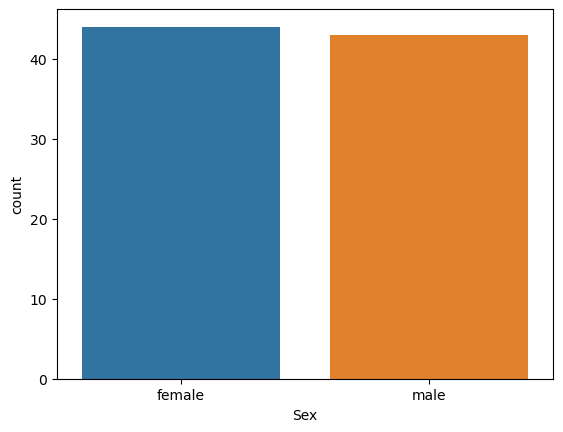

In [35]:
ax = sns.countplot(x = 'Sex',data = df)

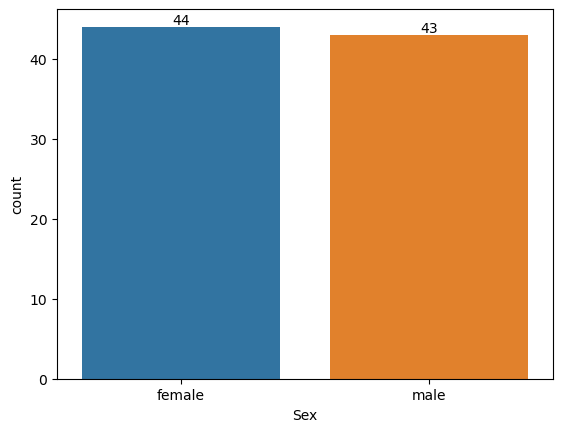

In [37]:
ax = sns.countplot(x = 'Sex',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Sex', ylabel='Survived'>

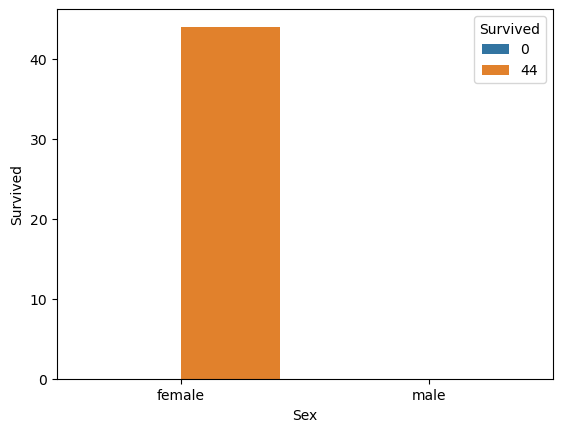

In [41]:
survived_sex = df.groupby(['Sex'], as_index = False)['Survived'].sum().sort_values(by = 'Survived', ascending=False)

sns.barplot(x = 'Sex',y = 'Survived', data = survived_sex, hue = 'Survived')


**AGE**

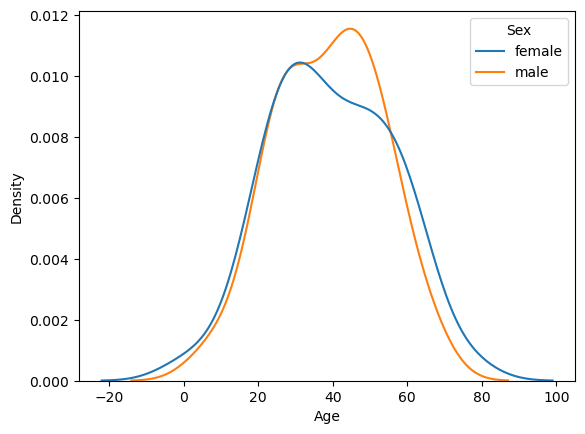

In [46]:
ax = sns.kdeplot(x = 'Age',data = df, hue = 'Sex')

for bars in ax.containers:
    ax.bar_label(bars)

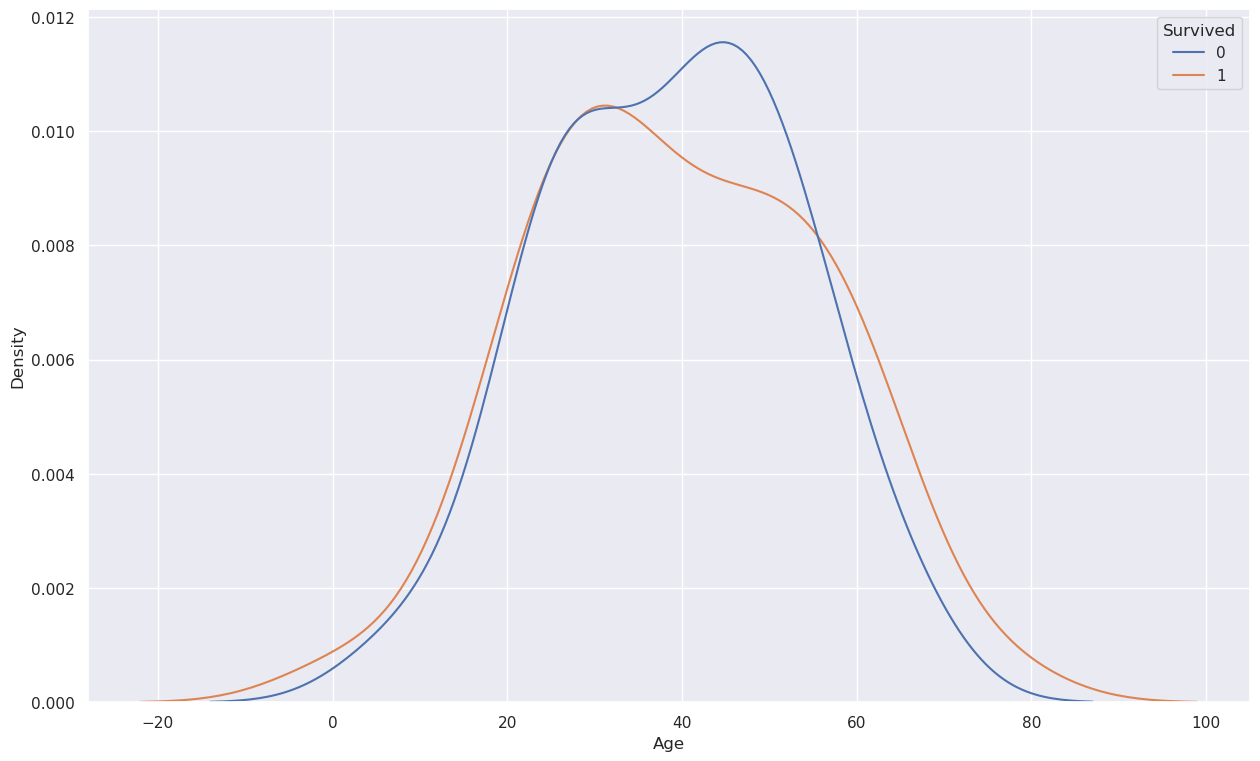

In [102]:
sns.kdeplot(x = 'Age',data = df, hue = 'Survived')

sns.set(rc={'figure.figsize':(15,9)})

In [61]:
df.groupby('Survived').Age.mean()

Survived
0    38.895349
1    39.590909
Name: Age, dtype: float64

*From the above graph we can conclude that only avg age group of female 39 are survivied*

**FARE**

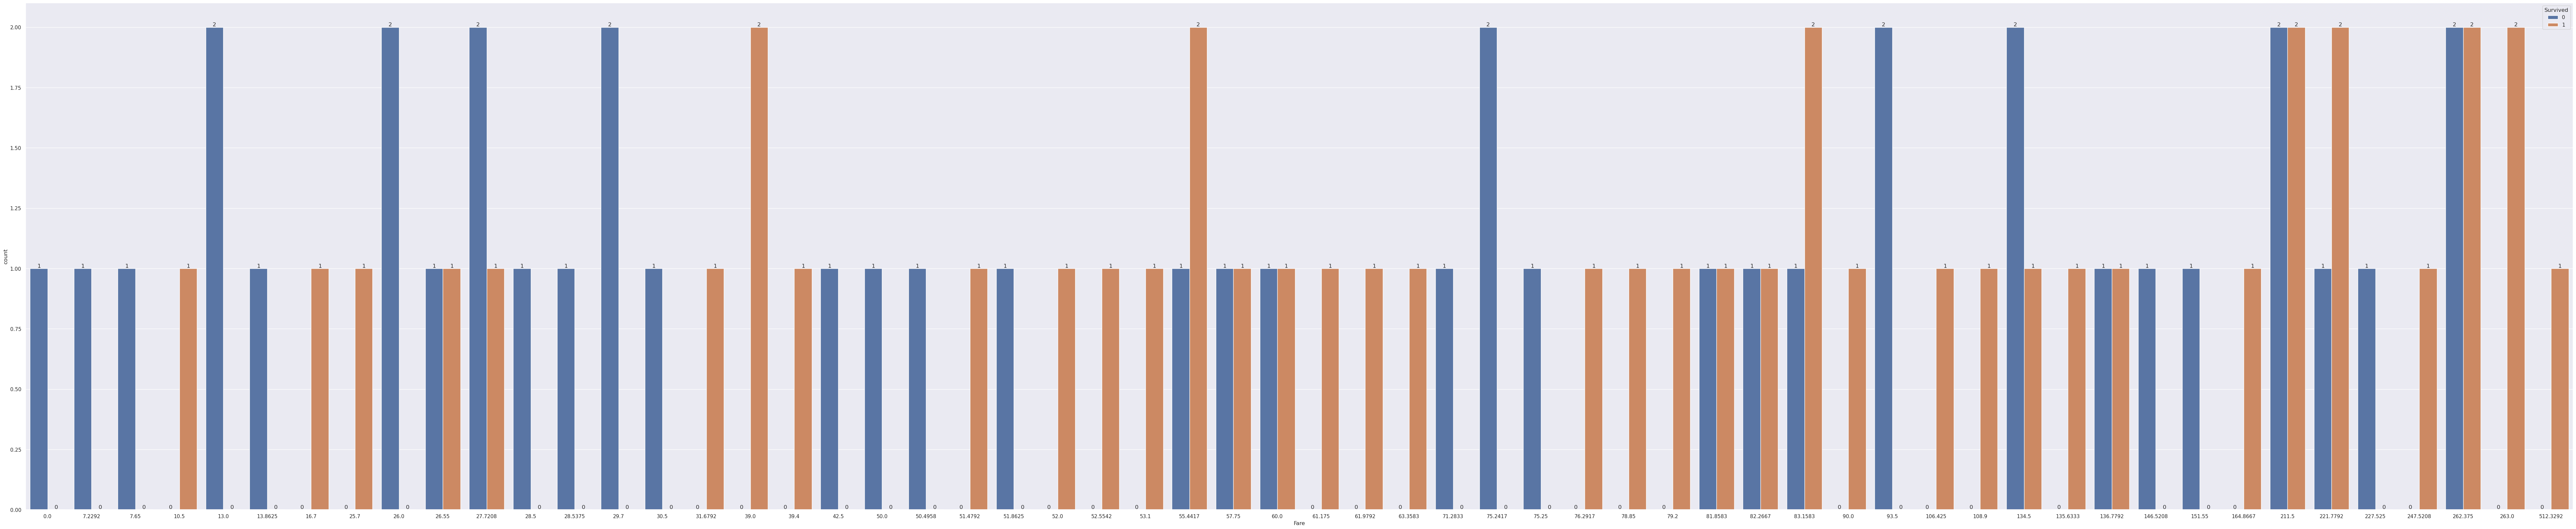

In [94]:
ax = sns.countplot(x = 'Fare',data = df , hue = 'Survived')

sns.set(rc={'figure.figsize':(100,20)})
for bars in ax.containers:
    ax.bar_label(bars)

In [66]:
df.groupby('Survived').Fare.mean()

Survived
0     82.230814
1    113.626709
Name: Fare, dtype: float64

In [96]:
df.Ticket

12             21228
14       W.E.P. 5734
24          PC 17608
26            113509
28            113054
           ...      
404            17765
405    SC/PARIS 2166
407           113503
411            19928
414         PC 17758
Name: Ticket, Length: 87, dtype: object

In [118]:
df.Name

12         Snyder, Mrs. John Pillsbury (Nelle Stevenson)
14     Chaffee, Mrs. Herbert Fuller (Carrie Constance...
24       Ryerson, Mrs. Arthur Larned (Emily Maria Borie)
26                          Ostby, Miss. Helene Ragnhild
28                               Brady, Mr. John Bertram
                             ...                        
404                         Frauenthal, Mr. Isaac Gerald
405         Nourney, Mr. Alfred (Baron von Drachstedt")"
407                           Widener, Mr. George Dunton
411      Minahan, Mrs. William Edward (Lillian E Thorpe)
414                         Oliva y Ocana, Dona. Fermina
Name: Name, Length: 87, dtype: object

**THE END**